Enter the csv file name including the .csv = commentData.csv
True Positive 18
False Positive 0
True Negative 4
False Negative 1
Neutral Results 25
Positive Results 24
Negative Results 7
Neutral Results 18
Accuracy for positive=  70.96774193548387
Precision=  100.0
Recall=  75.0


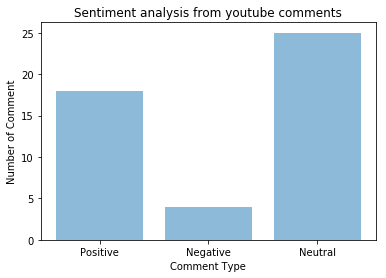

In [41]:
## Majid's Code implementation of SENTIMENT ANALYSIS for mobile review using Comments from Youtube.

import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

file_name=input('Enter the csv file name including the .csv = ')
label = ['Positive','Negative','Neutral']  ## Name of labels
index=np.arange(len(label)) ## will be used for plotting in graph
values=[]  ## for  
infile = file_name ## dataset for comment
true_neg=0
false_neg=0
true_pos=0
false_pos=0
neu=0

positive=0
negative=0
neutral=0
## code for Textblob for giving polarity 
with open(infile, 'r',encoding='utf8') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        sentence = row[0]
        blob = TextBlob(sentence)
        value = row[1]
        if value=='1':
            positive += 1
        if value=='-1':
            negative += 1
        if value=='0':
            neutral += 1
        
        if blob.sentiment.polarity >0 and value=='1':
            true_pos += 1
        elif blob.sentiment.polarity >0 and value=='-1':
            false_pos +=1
            
        if blob.sentiment.polarity <0 and value=='-1':
            true_neg += 1
        elif blob.sentiment.polarity <0 and value=='1':
            false_neg +=1
            
        if blob.sentiment.polarity==0:
            neu += 1
#        print (sentence)
#        print (blob.sentiment.polarity,value)

## printing for results of comments
print('True Positive',true_pos)
print('False Positive',false_pos)
print('True Negative',true_neg)
print('False Negative',false_neg)
print('Neutral Results',neu)

## printing for results of actual comment sentiments
print('Positive Results',positive)
print('Negative Results',negative)
print('Neutral Results',neutral)

print('Accuracy for positive= ',((true_pos+true_neg)/(positive+negative)*100))
print('Precision= ',(true_pos/(true_pos+false_pos))*100)
print('Recall= ',(true_pos/positive)*100)

## for appending positive, negative, neutral in values list for plotting
values.append(true_pos)
values.append(true_neg)
values.append(neu) 

## for plotting the Bar Graph according to the positive, negative and neutral review
plt.bar(index, values, align='center', alpha=0.5)
plt.xticks(index, label)
plt.ylabel('Number of Comment')
plt.xlabel('Comment Type')
plt.title('Sentiment analysis from youtube comments')

plt.show()
